<a href="https://colab.research.google.com/github/taylor-abolofia/taylor-abolofia/blob/main/EDA_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Lab using Python and Google Colab
## Introduction
In this lab, you will learn how to perform exploratory data analysis (EDA) using Python and Google Colab. EDA is a crucial step in the data analysis process, as it helps to understand the underlying structure and patterns of the data. You will work with the 'penguins' dataset from the seaborn library. By the end of this lab, you will have hands-on experience in data manipulation, data visualization, and data analysis.

## Objective
Familiarize with Google Colab and its features.

1.   Load and explore the 'penguins' dataset from the seaborn library.
2.   Perform data cleaning and preprocessing.
3. Conduct descriptive statistics and data visualization to understand the dataset.
4. Interpret the results and draw conclusions based on the EDA.




In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting style
sns.set_style('whitegrid')
%matplotlib inline

In this lab, you will use pandas for data manipulation, numpy for numerical operations, seaborn for data visualization, and matplotlib for customizing the appearance of the plots. Make sure to run the above code block to import these libraries and set up the seaborn plotting style.

**Think about it**


*   Why is it important to import all necessary libraries at the beginning of the analysis?
*   Can you think of other libraries that could be helpful in this analysis? If so, what are they and why would they be useful?



In [ ]:
# Load the dataset
penguins = sns.load_dataset('penguins')

# Display the first few rows
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

The 'penguins' dataset contains information about penguins collected from three islands in the Palmer Archipelago, Antarctica. The dataset includes measurements such as bill length, bill depth, flipper length, body mass, and information about the species and sex of the penguins.

In [ ]:
# Identify missing values
penguins.isnull().sum()

# Remove rows with missing values
penguins_clean = penguins.dropna()

# Encode categorical variables using pandas get_dummies
penguins_encoded = pd.get_dummies(penguins_clean, columns=['species', 'island', 'sex'], drop_first=True)

# Display the first 5 rows of the cleaned and encoded dataset
penguins_encoded.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
4            36.7           19.3              193.0       3450.0   
5            39.3           20.6              190.0       3650.0   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_Male  
0                  0               0             0                 1         1  
1                  0               0             0                 1         0  
2                  0               0             0                 1         0  
4                  0               0             0                 1         0  
5                  0               0             0                 1         1

In this section, we identify and remove missing values, then encode categorical variables using pandas' get_dummies function.

**Think about it**


*   What are the potential consequences of not handling missing values in a dataset?
*   Can you think of other methods for handling missing values besides removing rows with missing data? When might these other methods be more appropriate?



## Univariate analysis

We create a function plot_univariate that accepts a column name and generates a histogram, box plot, and density plot for the specified variable. This makes it easier to analyze different variables by simply passing their names to the function.

In [ ]:
def plot_univariate(column_name):
    """
    This function accepts a column name as an argument and plots a histogram, box plot,
    and density plot for the specified variable.
    """
    # Histogram
    penguins_clean[column_name].hist()
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.show()

    # Box plot
    sns.boxplot(penguins_clean[column_name])
    plt.title(f'Box plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

    # Density plot
    penguins_clean[column_name].plot(kind='density')
    plt.title(f'Density plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()


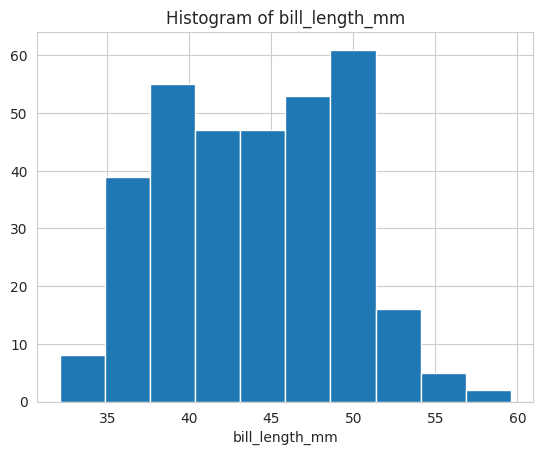

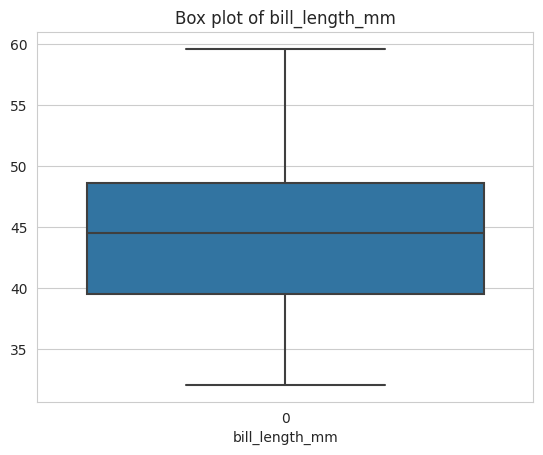

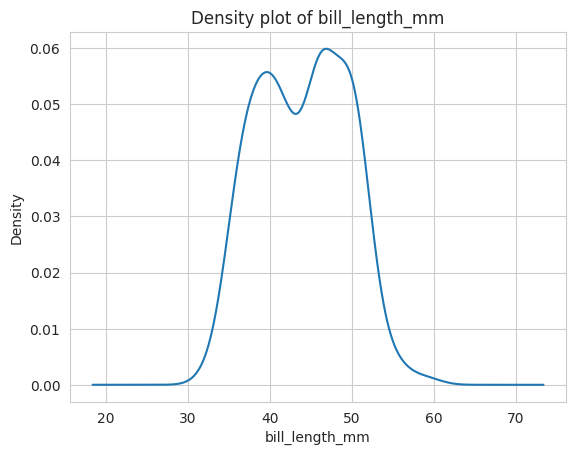

In [ ]:
# Example usage
plot_univariate('bill_length_mm')

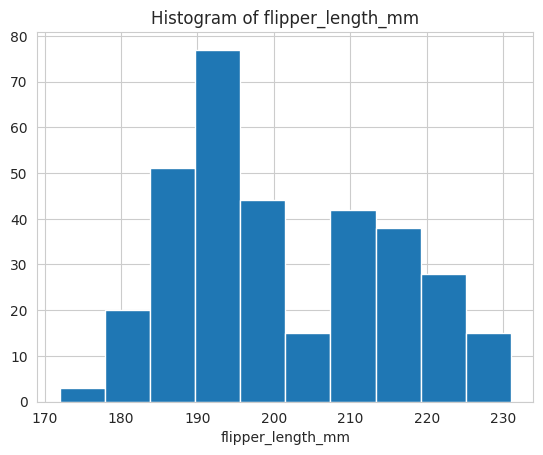

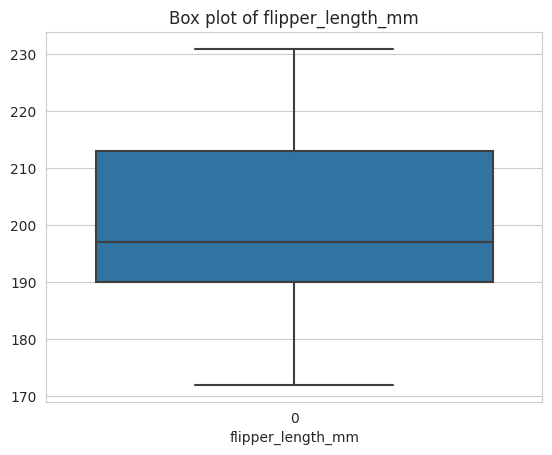

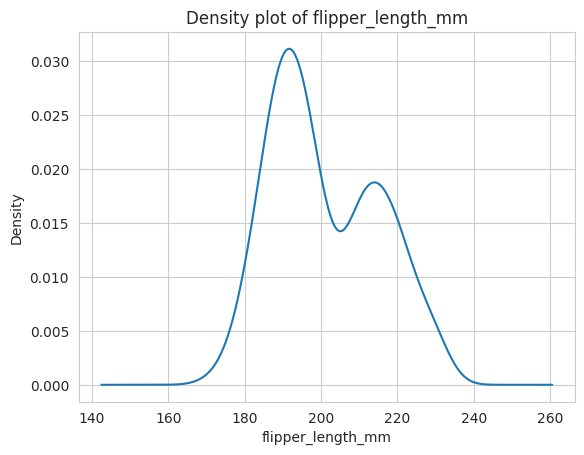

In [ ]:
plot_univariate('flipper_length_mm')

**Think about it**


*   What insights can you gain from analyzing the distribution of a single variable?
*   How can the choice of visualization technique (histogram, box plot, density plot) affect your understanding of a variable's distribution?



## Bivariate analysis
We create a function plot_bivariate that accepts two column names and generates a scatter plot, violin plot (if the relationship is categorical), and bar plot for the specified variables. This allows us to quickly visualize relationships between different variable pairs.

In [ ]:
def plot_bivariate(column1, column2, categorical=False):
    """
    This function accepts two column names as arguments and plots a scatter plot, violin plot (if categorical),
    and bar plot for the relationship between the specified variables.
    """
    # Scatter plot
    sns.scatterplot(x=column1, y=column2, data=penguins_clean, hue='species')
    plt.title(f'Scatter plot of {column1} vs {column2}')
    plt.show()

    if categorical:
        # Violin plot
        sns.violinplot(x=column1, y=column2, data=penguins_clean)
        plt.title(f'Violin plot of {column1} vs {column2}')
        plt.show()

        # Bar plot
        sns.barplot(x=column1, y=column2, data=penguins_clean)
        plt.title(f'Bar plot of {column1} vs {column2}')
        plt.show()


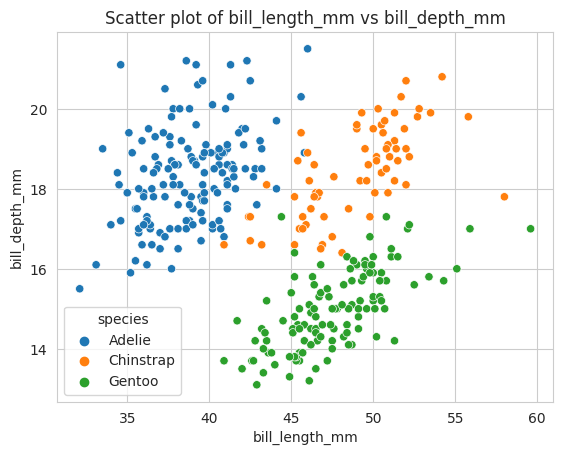

In [ ]:
plot_bivariate('bill_length_mm', 'bill_depth_mm')

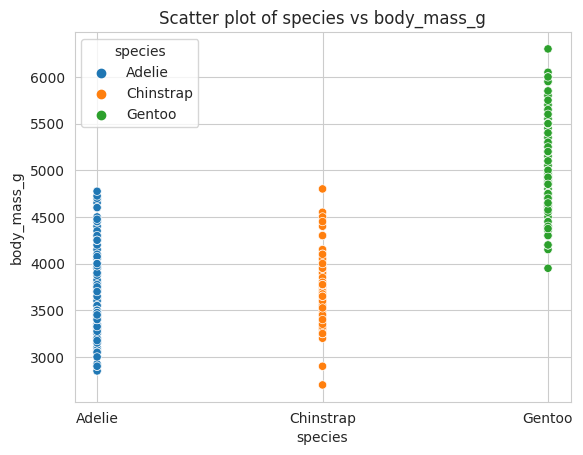

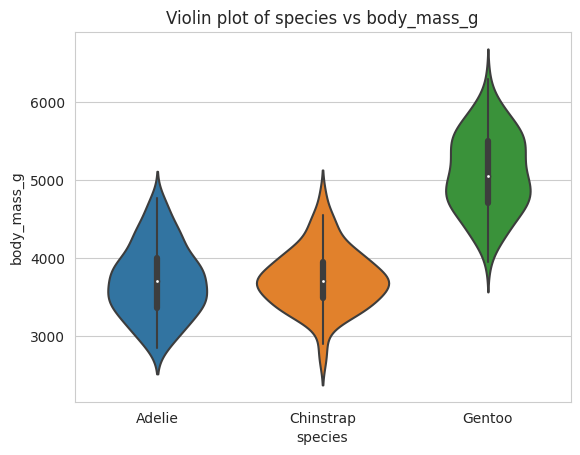

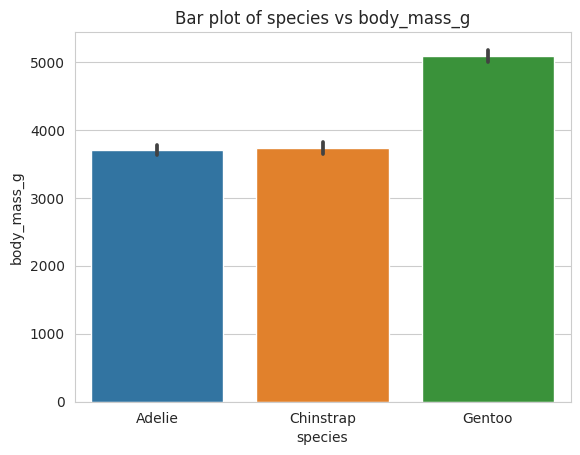

In [ ]:
plot_bivariate('species', 'body_mass_g', categorical=True)

**Think about it**


*   What are some other ways to visualize relationships between two continuous variables, besides scatter plots?
*   How can violin plots and bar plots help you understand the relationship between a continuous variable and a categorical variable?


## Multivariate analysis

Pair plots provide a comprehensive visualization of relationships between all pairs of continuous variables.



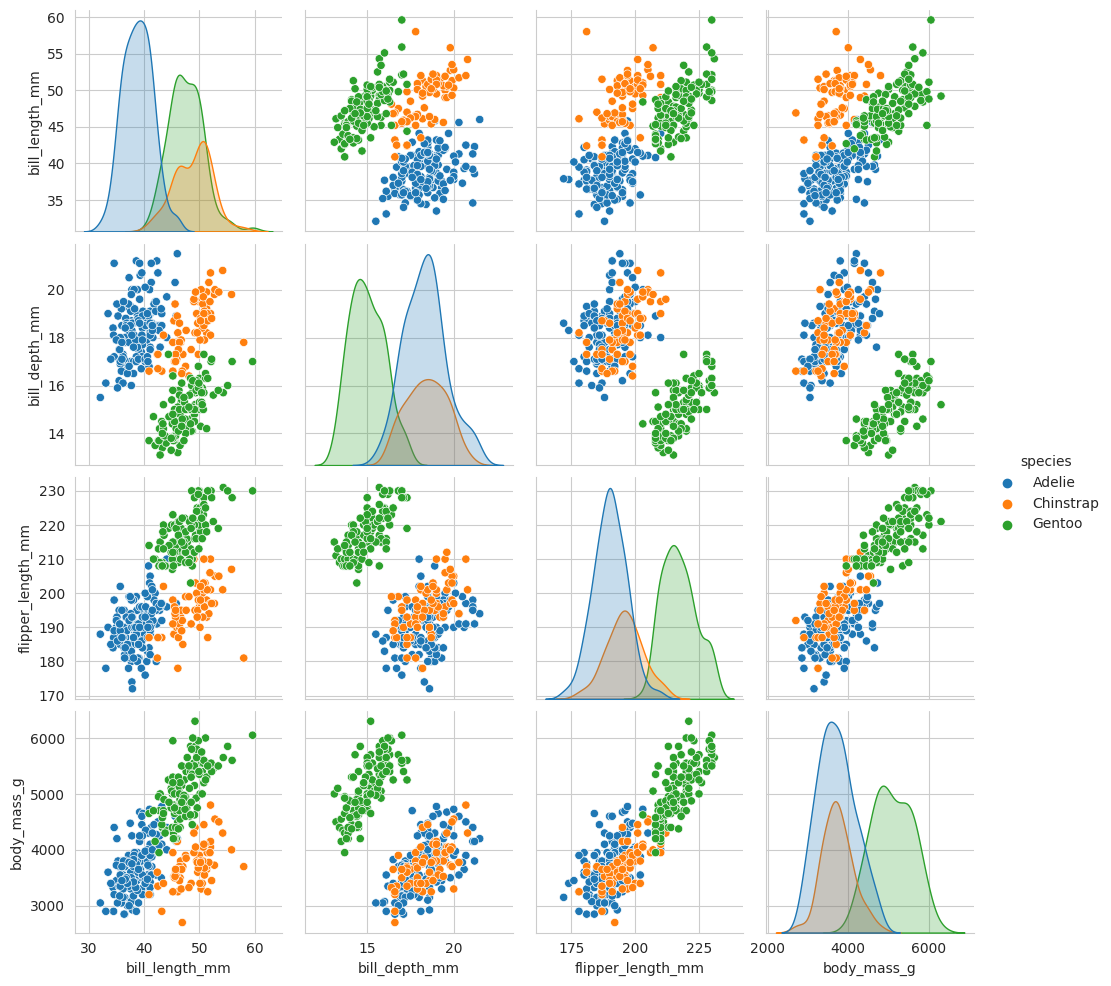

In [ ]:
# Pair plots for all continuous variables
sns.pairplot(penguins_clean, hue='species', diag_kind='kde')
plt.show()


FacetGrid allows us to visualize the relationship between multiple features by creating a grid of plots.

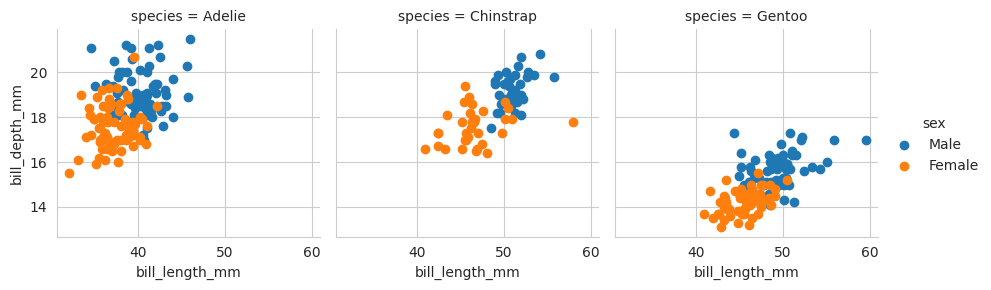

In [ ]:
# FacetGrid for visualizing the relationship between multiple features
g = sns.FacetGrid(penguins_clean, col='species', hue='sex')
g.map(plt.scatter, 'bill_length_mm', 'bill_depth_mm')
g.add_legend()
plt.show()



Joyplots display the distribution of a continuous variable across categorical features using a series of overlapping density plots.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


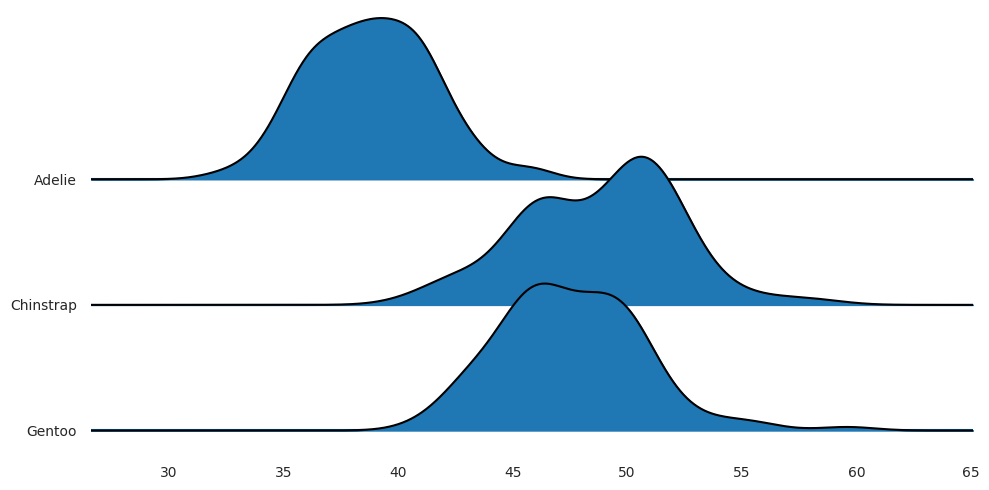

In [ ]:
# Joyplots with joypy
!pip install joypy
import joypy

# Plot joyplots for bill_length_mm by species
fig, axes = joypy.joyplot(penguins_clean, by='species', column='bill_length_mm', figsize=(10, 5))
plt.show()

We use K-means clustering to group similar data points together and visualize the clusters on a scatter plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


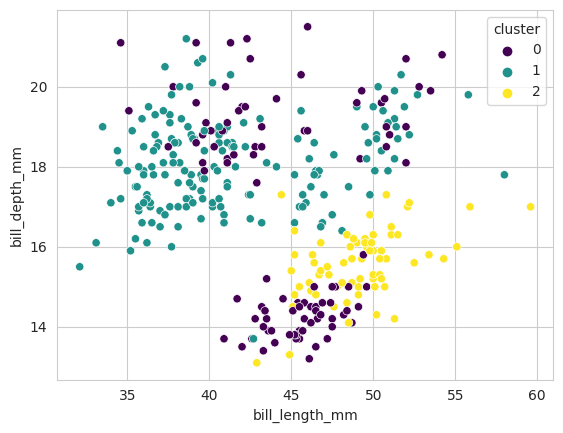

In [ ]:
# Clustering using K-means
from sklearn.cluster import KMeans

# Fit the K-means model with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(penguins_encoded)

# Add the cluster labels to the dataset
penguins_encoded['cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_encoded, hue='cluster', palette='viridis')
plt.show()


**Think about it**


*   How can you use pair plots to quickly identify potential relationships between multiple variables?
*   What are some other clustering techniques that could be used to group similar data points in a dataset? How might they differ from K-means clustering?



## Automated EDA using Pandas-based libraries
In this section, we will explore some popular pandas-based libraries that can help automate the EDA process. These libraries generate comprehensive reports with various visualizations and statistics, which can help us gain insights more quickly.

### Pandas-profiling

Pandas-Profiling is a library that generates interactive HTML reports from a pandas DataFrame, providing an extensive analysis of the dataset.

In [ ]:
# Install Pandas-Profiling
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
  Using cached matplotlib-3.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
# Import the library
import pandas_profiling as pp

# Generate a report using pandas-profiling
penguins_report = pp.ProfileReport(penguins_clean)
penguins_report.to_notebook_iframe()

<ipython-input-23-b892ffe827b4>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Sweetviz
Sweetviz is another library that creates visualizations and statistical summaries of pandas DataFrames. It generates an HTML report that can be viewed in a Jupyter Notebook or saved as a standalone file.

In [ ]:
# Install Sweetviz
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.1


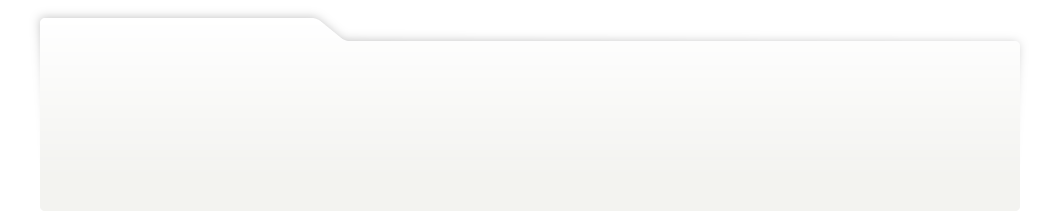
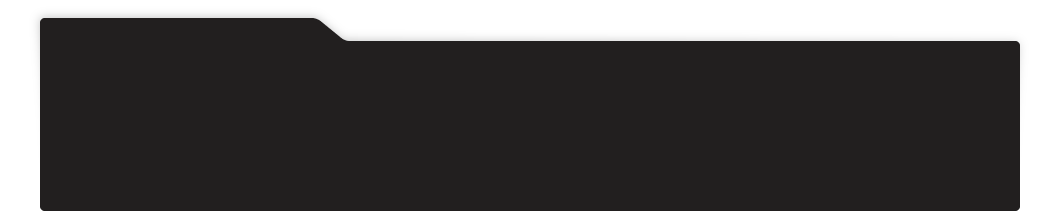
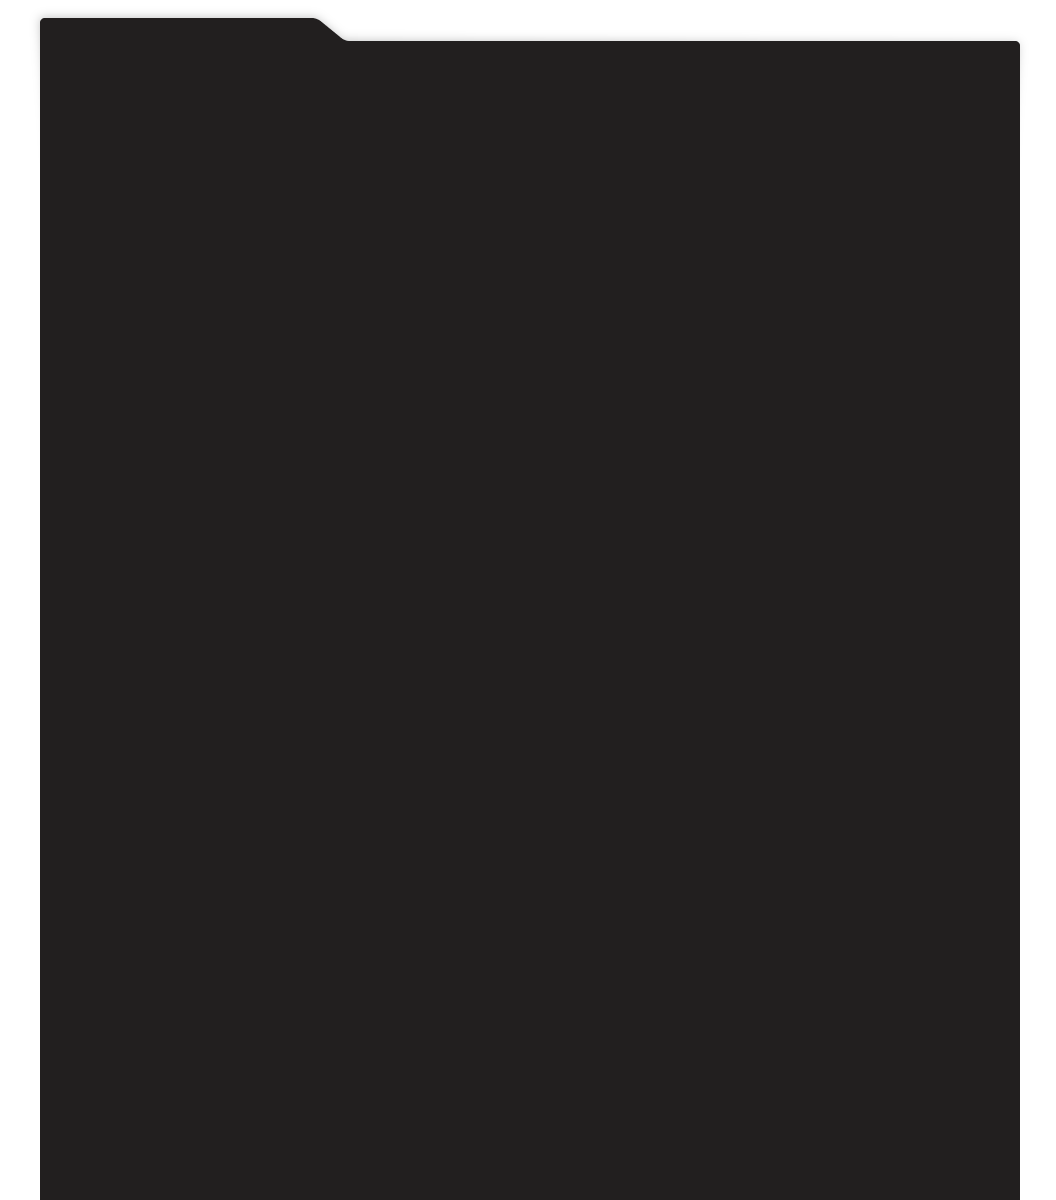
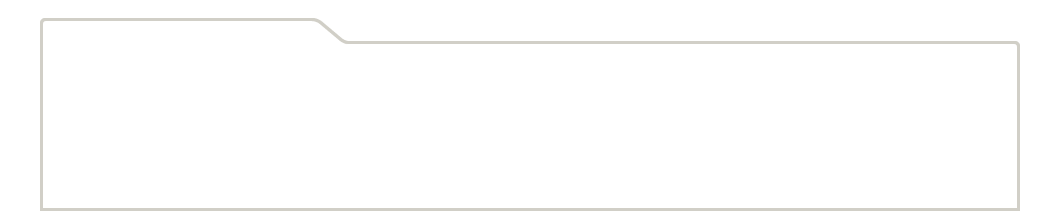
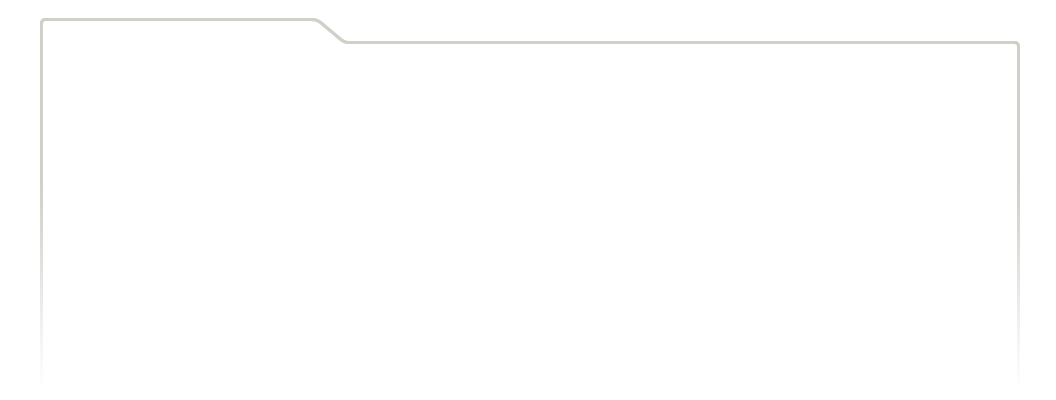
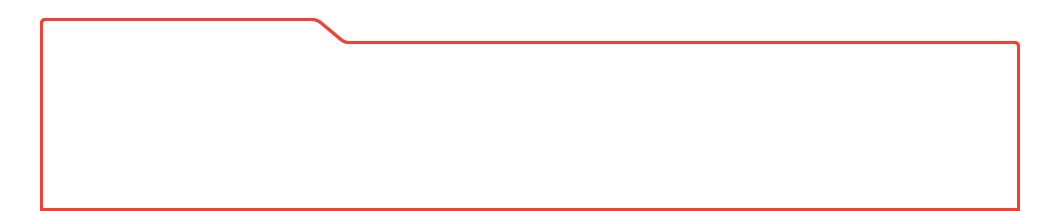
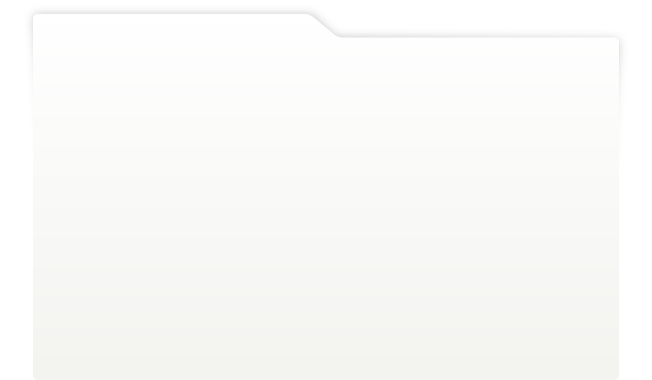
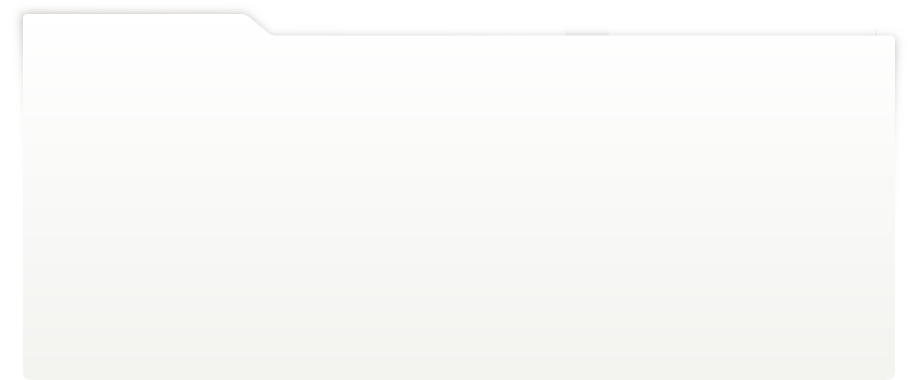
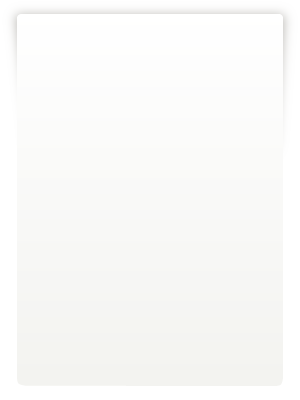
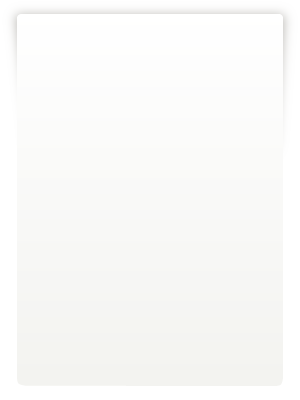
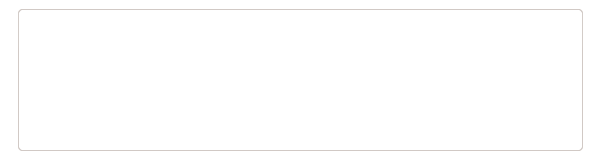
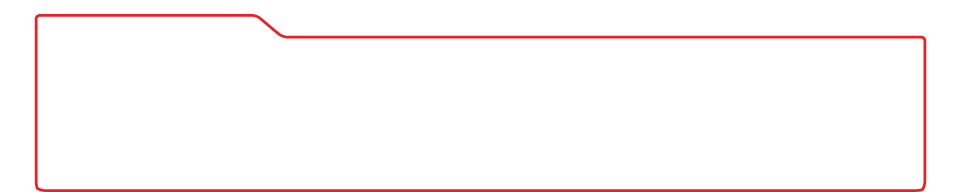
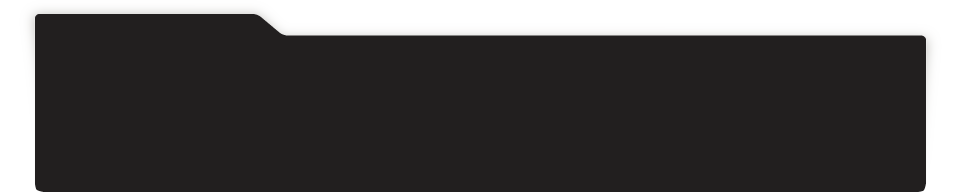
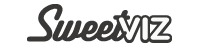
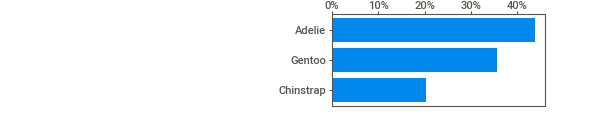
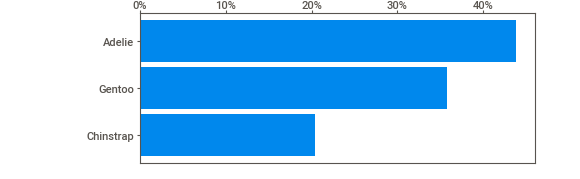
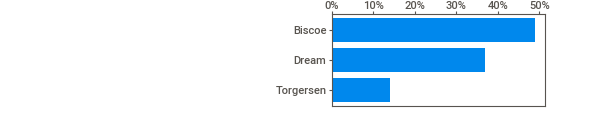
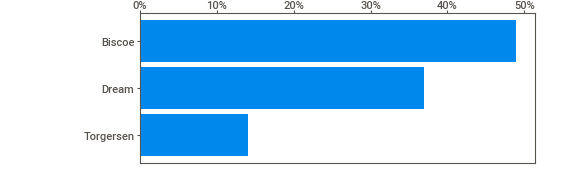
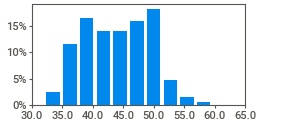
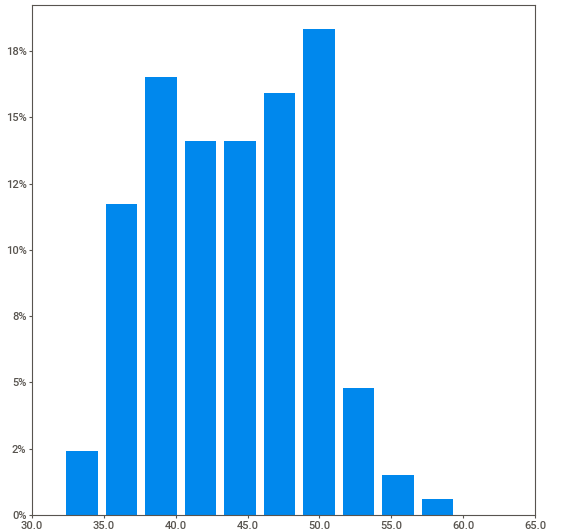
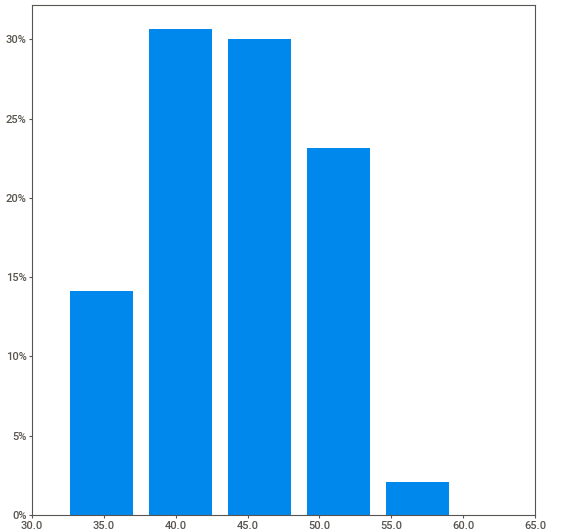
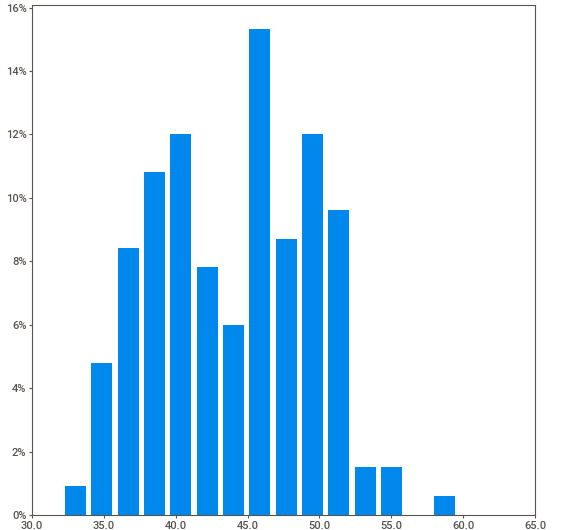
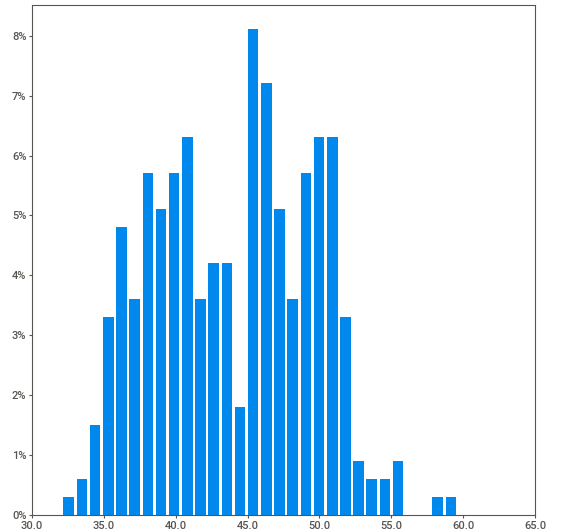
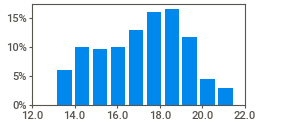
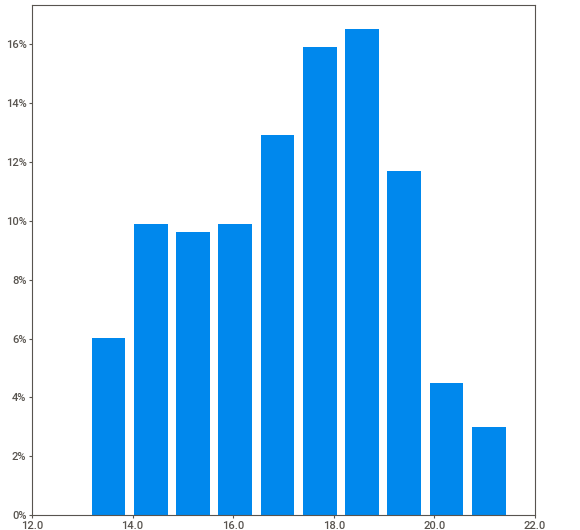
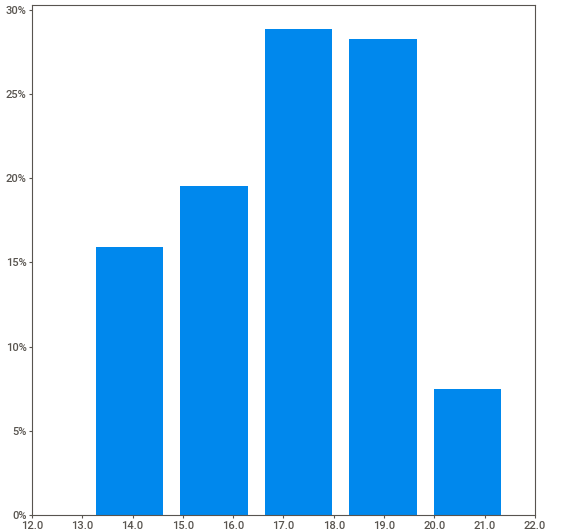
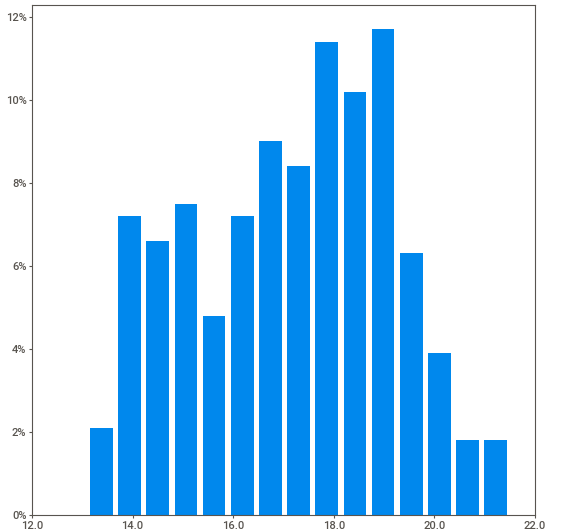
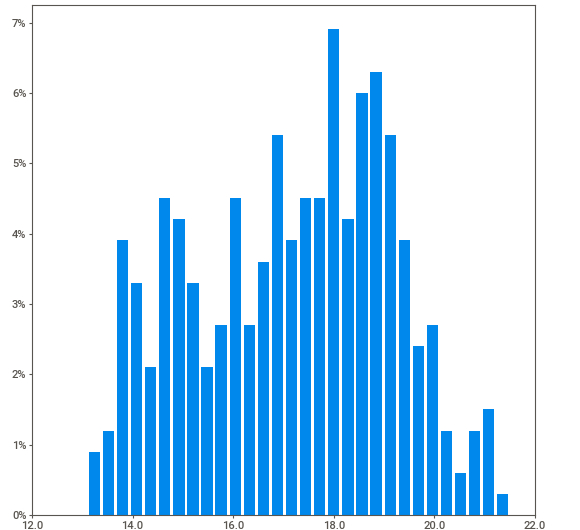
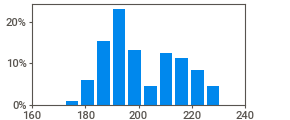
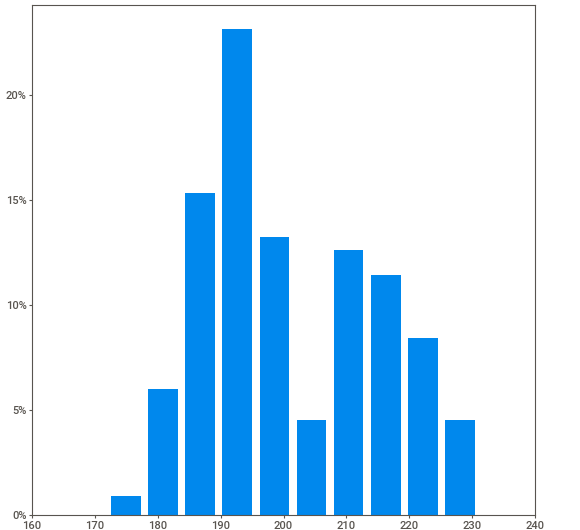
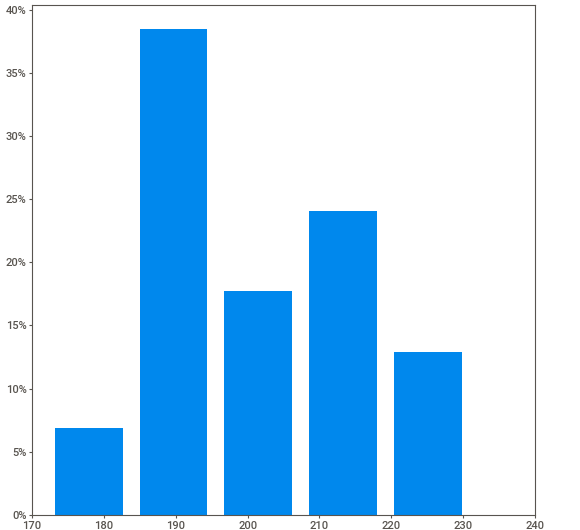
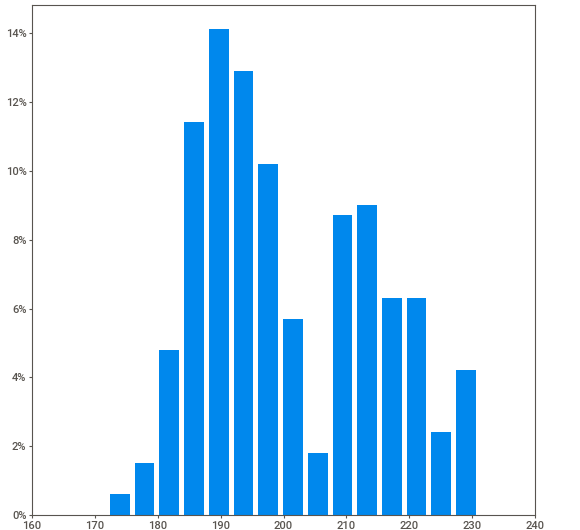
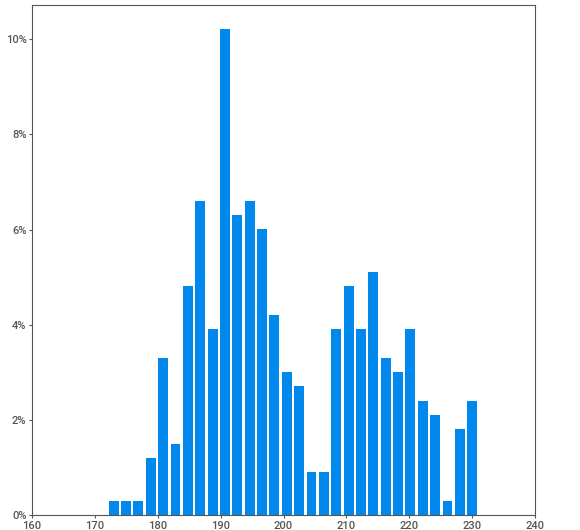
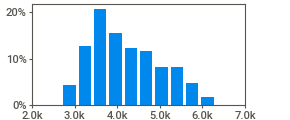
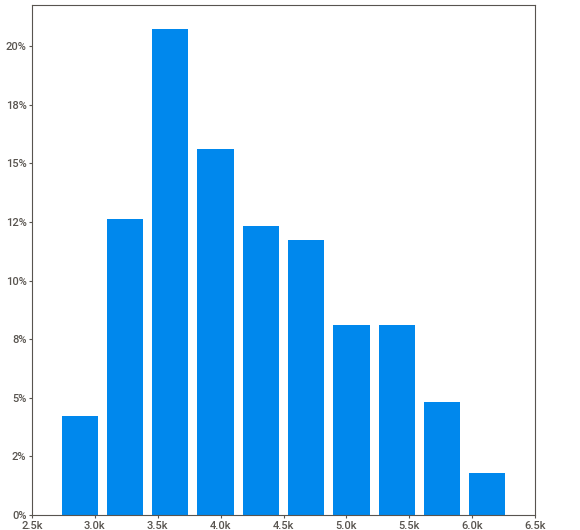
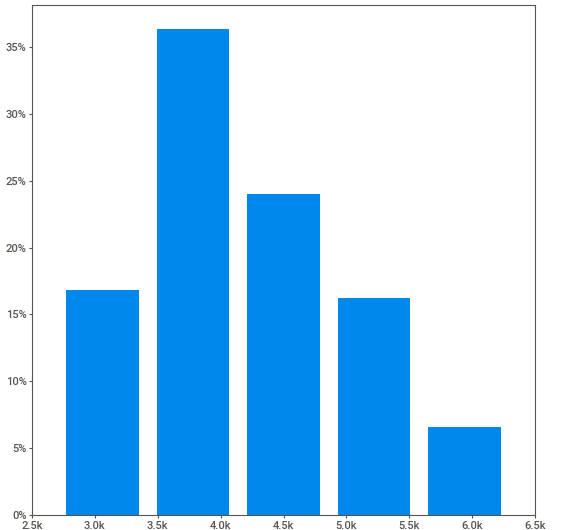
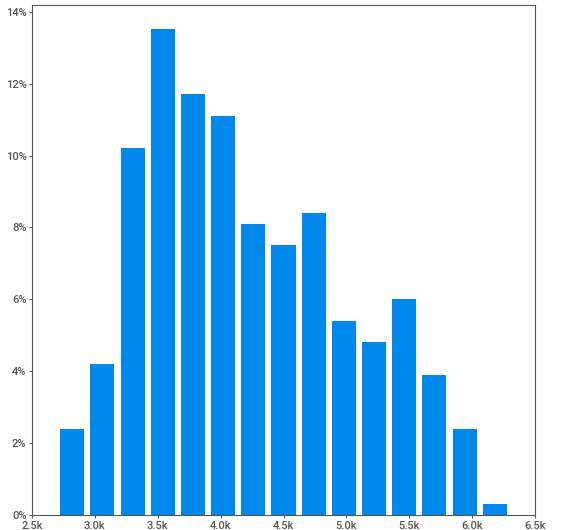
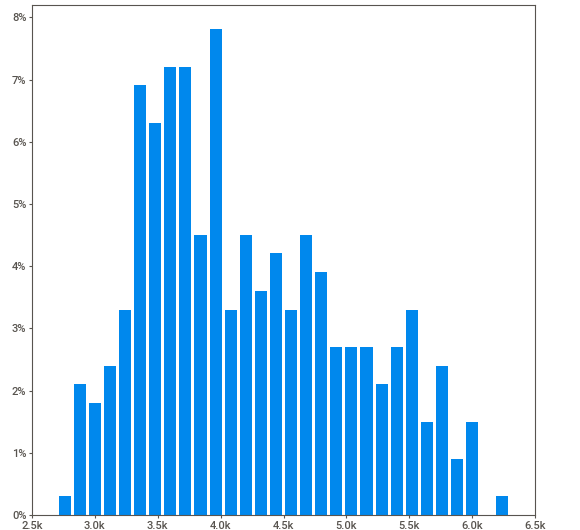
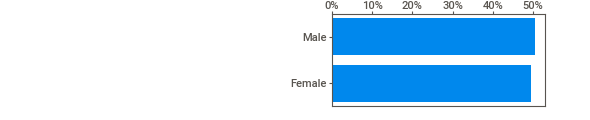
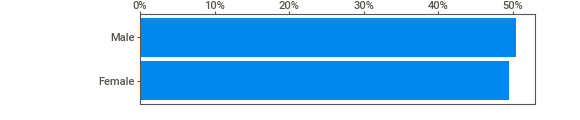
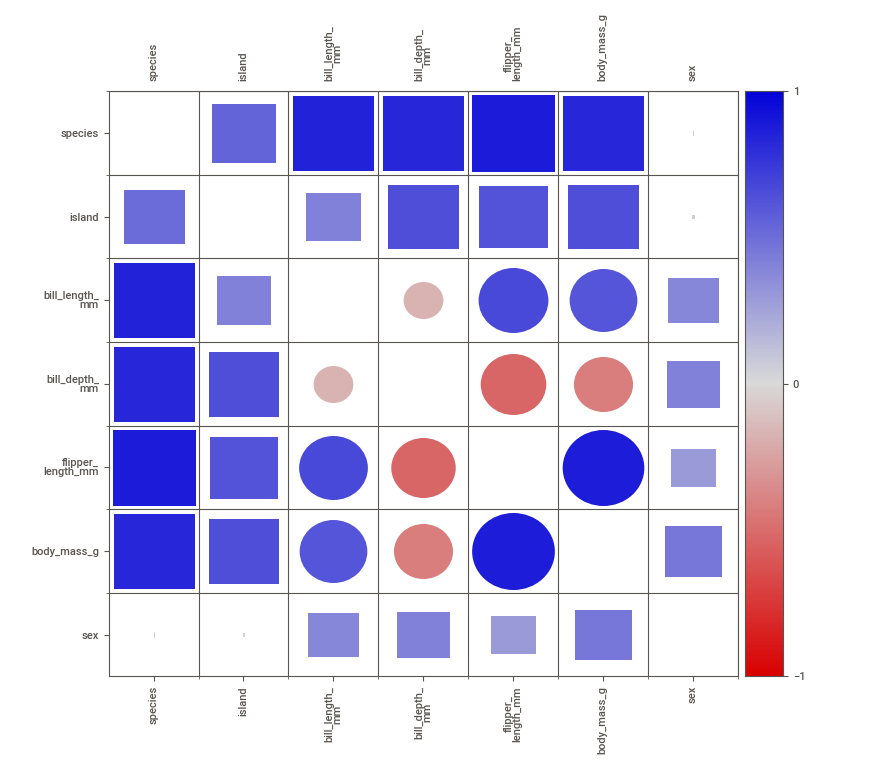
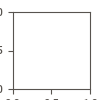

In [ ]:
# Import the library
import sweetviz as sv

# Generate a report using Sweetviz
penguins_report = sv.analyze(penguins_clean)
penguins_report.show_notebook()

**Think about it**


*   What are some advantages and disadvantages of using automated EDA libraries compared to manually creating visualizations and summaries?
*   How can you use automated EDA libraries to complement the manual EDA process?



# Summary
In this lab, we have covered various techniques for Exploratory Data Analysis (EDA) on the Penguins dataset. We began by setting up the environment and loading the dataset using Seaborn. Next, we proceeded with data cleaning and preprocessing by handling missing values and encoding categorical variables.

We performed univariate, bivariate, and multivariate analyses using custom functions and Seaborn visualizations. To make the process more modular, we created functions for univariate (`plot_univariate`) and bivariate (`plot_bivariate`) analyses, which allowed us to analyze different variables and their relationships with ease. Multivariate analysis included pair plots, FacetGrid, joyplots, and clustering using K-means.

Additionally, we explored various pandas-based libraries for automated EDA, including Pandas-Profiling, Sweetviz, Autoviz, and D-Tale. These libraries help generate comprehensive reports with visualizations and statistics to gain insights more quickly.

By following this lab, you should have gained a deeper understanding of the Penguins dataset, the use of Seaborn and other libraries for data visualization, and the importance of EDA in the data analysis process. Along the way, we posed "Think About It" questions to encourage you to reflect on the techniques and visualizations used and consider their implications and potential alternatives.

The insights gained from this EDA can guide the next steps in the data analysis process, such as feature engineering, model selection, and evaluation. You are encouraged to continue your exploration of the Penguins dataset and apply the techniques learned in this lab to other datasets in order to gain a broader understanding of EDA and its applications.
